In [1]:
!pip install mediapipe opencv-python pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uni

In [4]:
import os

# Rename uploaded video to 'cover_drive.mp4'
os.rename("/content/Stunning cover drive #cricket #batreview #cricketbattingpractice #ytshorts.mp4",
          "/content/cover_drive.mp4")

print("Renamed to 'cover_drive.mp4'")

Renamed to 'cover_drive.mp4'


In [5]:
import mediapipe as mp

# Initialize MediaPipe pose estimator
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Create the pose object (for video stream)
pose = mp_pose.Pose(static_image_mode=False,
                    min_detection_confidence=0.5,
                    model_complexity=1)

print("MediaPipe Pose model initialized")


MediaPipe Pose model initialized


In [6]:
import cv2

# Load video
video_path = "/content/cover_drive.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video loaded successfully")
print(f"Dimensions: {frame_width}x{frame_height}")
print(f"FPS: {fps}")
print(f"Total Frames: {total_frames}")


Video loaded successfully
Dimensions: 720x1280
FPS: 30.0
Total Frames: 139


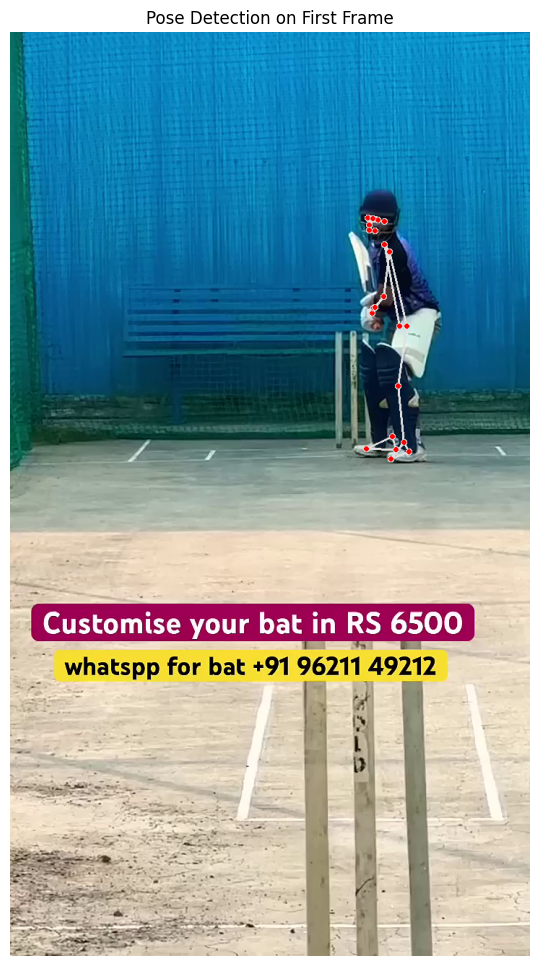

In [7]:
import matplotlib.pyplot as plt

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Failed to read frame.")
else:
    # Convert BGR to RGB (MediaPipe expects RGB)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run pose detection
    results = pose.process(rgb_frame)

    # Draw landmarks on a copy of the frame
    annotated_frame = frame.copy()
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            annotated_frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS)

    # Convert to RGB for display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(8, 12))
    plt.imshow(annotated_frame_rgb)
    plt.axis('off')
    plt.title("Pose Detection on First Frame")
    plt.show()


In [8]:
import numpy as np
import math

def calculate_angle(a, b, c):
    """
    Calculates the angle at point b (in degrees)
    where a, b, c are (x, y) coordinates.
    """
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    ab = a - b
    cb = c - b

    # Compute cosine angle
    cosine_angle = np.dot(ab, cb) / (np.linalg.norm(ab) * np.linalg.norm(cb))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))

    return np.degrees(angle)


In [10]:
# Reset video
cap = cv2.VideoCapture("/content/cover_drive.mp4")
output_path = "/content/annotated_final_fixed.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

frame_count = 0
persistent_issues = {}

def draw_text(frame, text, position, font_scale=1.2, color=(0, 0, 0), thickness=2):
    """Draw text with white outline and filled color"""
    x, y = position
    cv2.putText(frame, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, (255, 255, 255), thickness + 2, cv2.LINE_AA)
    cv2.putText(frame, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, color, thickness, cv2.LINE_AA)

def log_issue(issue, time_sec):
    if issue not in persistent_issues:
        persistent_issues[issue] = []
    timestamp = round(float(time_sec), 1)
    if timestamp not in persistent_issues[issue]:
        persistent_issues[issue].append(timestamp)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    time_sec = frame_count / fps
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark

        def get_point(idx):
            return [landmarks[idx].x * frame_width, landmarks[idx].y * frame_height]

        # Extract joints
        shoulder, elbow, wrist = map(get_point, [mp_pose.PoseLandmark.LEFT_SHOULDER.value,
                                                  mp_pose.PoseLandmark.LEFT_ELBOW.value,
                                                  mp_pose.PoseLandmark.LEFT_WRIST.value])
        hip, knee, ankle = map(get_point, [mp_pose.PoseLandmark.LEFT_HIP.value,
                                           mp_pose.PoseLandmark.LEFT_KNEE.value,
                                           mp_pose.PoseLandmark.LEFT_ANKLE.value])
        nose = get_point(mp_pose.PoseLandmark.NOSE.value)

        # --- Metrics ---
        elbow_angle = int(calculate_angle(shoulder, elbow, wrist))
        spine_vector = np.array(shoulder) - np.array(hip)
        spine_unit = spine_vector / np.linalg.norm(spine_vector)
        spine_angle = int(np.degrees(np.arccos(np.clip(np.dot(spine_unit, [0, -1]), -1.0, 1.0))))
        head_knee_dx = int(abs(nose[0] - knee[0]))
        leg_vector = np.array(ankle) - np.array(knee)
        leg_unit = leg_vector / np.linalg.norm(leg_vector)
        foot_angle = int(np.degrees(np.arccos(np.clip(np.dot(leg_unit, [1, 0]), -1.0, 1.0))))
        if foot_angle > 90:
            foot_angle = 180 - foot_angle

        # Draw pose
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # --- HUD Metrics (top-left, smaller font) ---
        hud_x, hud_y = 10, 30
        spacing = 25
        draw_text(frame, f'Elbow: {elbow_angle} deg', (hud_x, hud_y), font_scale=0.6)
        draw_text(frame, f'Spine: {spine_angle} deg', (hud_x, hud_y + spacing), font_scale=0.6)
        draw_text(frame, f'Head-Knee X: {head_knee_dx}px', (hud_x, hud_y + 2 * spacing), font_scale=0.6)
        draw_text(frame, f'Foot Dir: {foot_angle} deg', (hud_x, hud_y + 3 * spacing), font_scale=0.6)

        # --- Feedback Logic ---
        live_message = ""
        if not 100 <= elbow_angle <= 145:
            live_message = "Adjust your elbow angle"
            log_issue("Elbow angle needs improvement", time_sec)
        elif not 10 <= spine_angle <= 25:
            live_message = "Maintain spine balance"
            log_issue("Posture is inconsistent", time_sec)
        elif head_knee_dx > 50:
            live_message = "Bring head over front knee"
            log_issue("Head not aligned over knee", time_sec)
        elif foot_angle >= 45:
            live_message = "Point front foot forward"
            log_issue("Front foot alignment off", time_sec)
        else:
            live_message = "Good posture!"

        # --- Draw live message (clamped to frame) ---
        text_size = cv2.getTextSize(live_message, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 2)[0]
        feedback_x = int(nose[0] - text_size[0] // 2)
        feedback_x = max(10, min(feedback_x, frame_width - text_size[0] - 10))
        feedback_y = int(min(nose[1] + 140, frame_height - 20))
        draw_text(frame, live_message, (feedback_x, feedback_y), font_scale=1.2)


        # --- Draw persistent feedback (top-right) ---
        y_offset = 40
        for i, (issue, times) in enumerate(sorted(persistent_issues.items())):
            if not times:
                continue
            sorted_times = sorted(times)
            if len(sorted_times) == 1:
                duration = f"[{sorted_times[0]}s]"
            else:
                duration = f"[{sorted_times[0]}s - {sorted_times[-1]}s]"  # FIXED DASH
            issue_msg = f"- {issue} {duration}"
            draw_text(frame, issue_msg,
                      (frame_width - 470, y_offset),
                      font_scale=0.6,
                      color=(0, 0, 0))
            y_offset += 25



    out.write(frame)
    frame_count += 1
    if frame_count % 30 == 0:
        print(f"Processed {frame_count}/{total_frames} frames...")

cap.release()
out.release()
print(f"\nFinal corrected video saved at: {output_path}")


Processed 30/139 frames...
Processed 60/139 frames...
Processed 90/139 frames...
Processed 120/139 frames...

Final corrected video saved at: /content/annotated_final_fixed.mp4


In [11]:
import json

def evaluate_category(issue_key, description, all_issues):
    timestamps = all_issues.get(issue_key, [])
    if not timestamps:
        return 10, f"✅ Excellent. {description}"
    elif len(timestamps) <= 2:
        return 8, f"⚠️ Minor inconsistency. {description}"
    elif len(timestamps) <= 5:
        return 6, f"❌ Needs improvement. {description}"
    else:
        return 4, f"❌ Major issue observed repeatedly. {description}"

# Compose evaluation
evaluation = {}

score, feedback = evaluate_category(
    "Front foot alignment off",
    "Front foot should point more toward the direction of the shot.",
    persistent_issues
)
evaluation["Footwork"] = {"score": score, "feedback": feedback}

score, feedback = evaluate_category(
    "Head not aligned over knee",
    "Keeping the head above the front knee improves balance and timing.",
    persistent_issues
)
evaluation["Head Position"] = {"score": score, "feedback": feedback}

score, feedback = evaluate_category(
    "Posture is inconsistent",
    "Maintain a consistent forward lean with a stable spine.",
    persistent_issues
)
evaluation["Balance"] = {"score": score, "feedback": feedback}

evaluation["Swing Control"] = {
    "score": None,
    "feedback": "Not evaluated — bat tracking not implemented."
}

evaluation["Follow-through"] = {
    "score": None,
    "feedback": "Not evaluated — follow-through not measured in current version."
}

# Save to JSON
with open("/content/evaluation.json", "w") as f:
    json.dump(evaluation, f, indent=4)

print("Final evaluation saved as evaluation.json")


Final evaluation saved as evaluation.json


In [12]:
import json

# Load the evaluation report
with open("/content/evaluation.json", "r") as f:
    evaluation = json.load(f)

# Print each category score + feedback
for category, data in evaluation.items():
    print(f"📌 {category}")
    print(f"   Score   : {data['score']}")
    print(f"   Feedback: {data['feedback']}\n")


📌 Footwork
   Score   : 6
   Feedback: ❌ Needs improvement. Front foot should point more toward the direction of the shot.

📌 Head Position
   Score   : 4
   Feedback: ❌ Major issue observed repeatedly. Keeping the head above the front knee improves balance and timing.

📌 Balance
   Score   : 4
   Feedback: ❌ Major issue observed repeatedly. Maintain a consistent forward lean with a stable spine.

📌 Swing Control
   Score   : None
   Feedback: Not evaluated — bat tracking not implemented.

📌 Follow-through
   Score   : None
   Feedback: Not evaluated — follow-through not measured in current version.



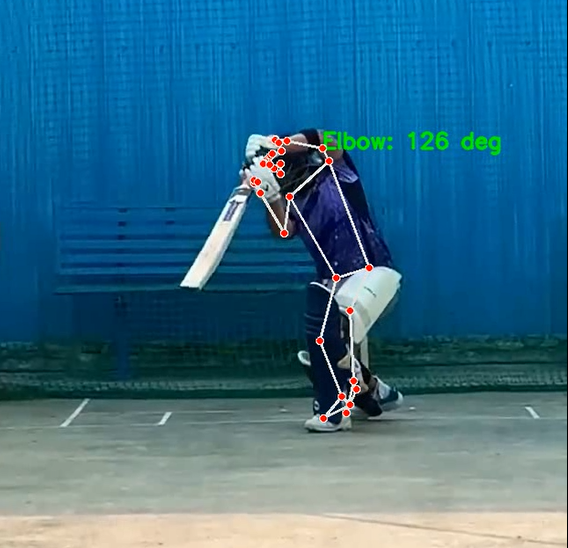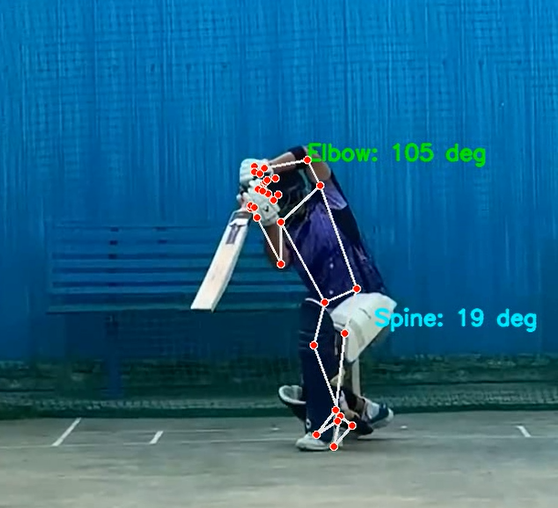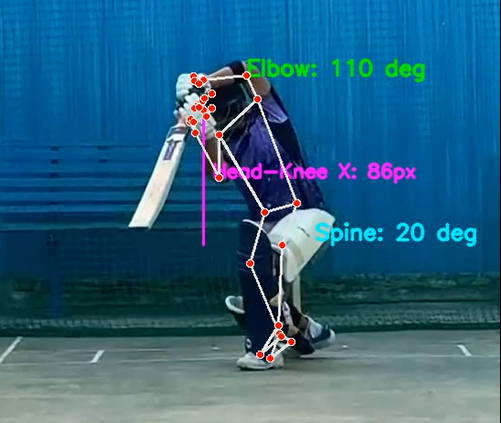

**A Screenshot from the Final Live Analysis Video**

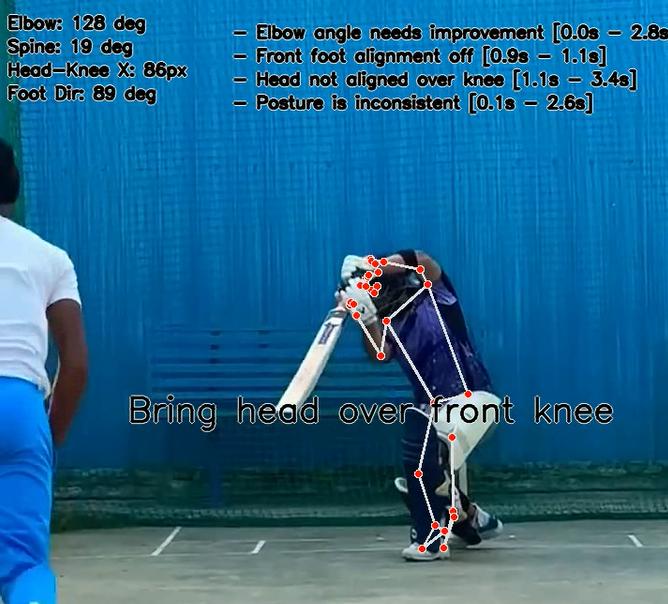